In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline 

In [2]:
df=pd.read_csv("/Users/raghavkachroo/Desktop/iNeuron/Store-Sales-Prediction/storesales_train.csv")
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
df.drop("Item_Identifier",axis=1,inplace=True)
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [5]:
dfnumerical=df[["Item_Weight","Item_Visibility","Item_MRP","Outlet_Establishment_Year","Item_Outlet_Sales"]]
dfcat=df[["Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Size","Outlet_Location_Type","Outlet_Type"]]

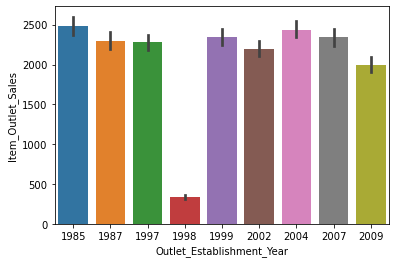

In [6]:
sns.barplot(x="Outlet_Establishment_Year",y="Item_Outlet_Sales",data=dfnumerical)

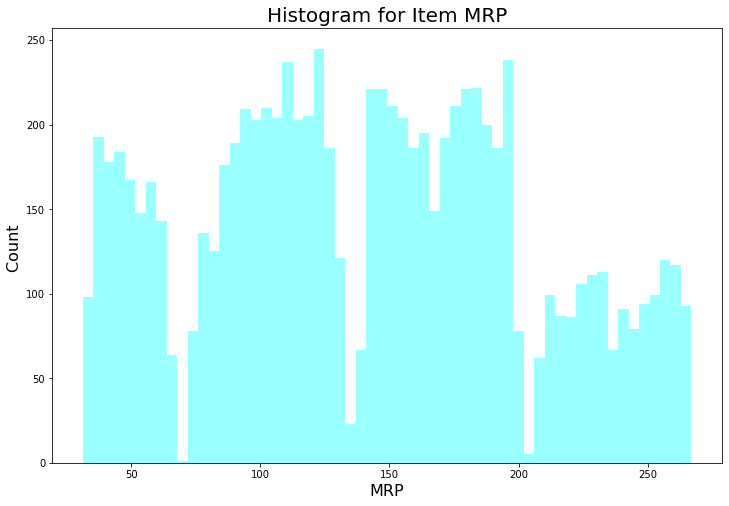

In [7]:
x = df.Item_MRP
plt.figure(figsize = (12, 8))
plt.style.use('tableau-colorblind10')

ax = sns.distplot(x, bins = 58, kde = False, color = 'cyan')
ax.set_xlabel(xlabel = 'MRP', fontsize = 16)
ax.set_ylabel(ylabel = 'Count ',fontsize = 16)
ax.set_title(label = 'Histogram for Item MRP', fontsize = 20)
plt.show()

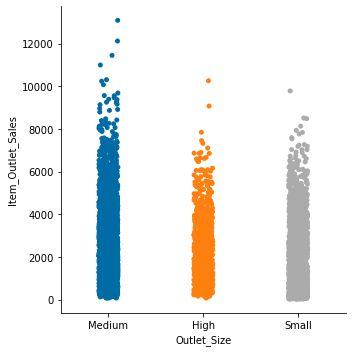

In [8]:
sns.catplot(x="Outlet_Size",y="Item_Outlet_Sales",data=df)

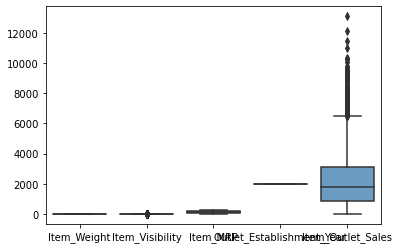

In [9]:
sns.boxplot(data=dfnumerical)

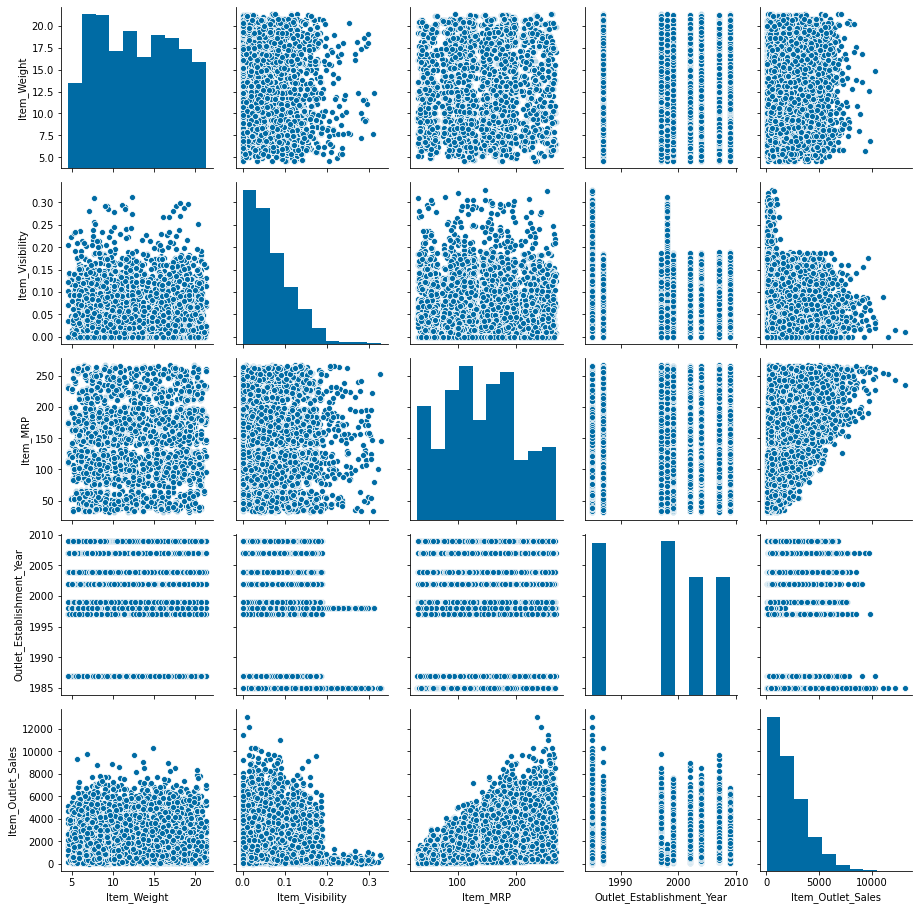

In [10]:
sns.pairplot(dfnumerical)

In [11]:
def outliercapping(x):
    x=x.clip(upper=x.quantile(0.99))
    x=x.clip(lower=x.quantile(0.01))
    return x
dfnumerical=dfnumerical.apply(outliercapping)

In [12]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])
dfnumerical.apply(var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Item_Weight,7060.0,1463.0,9.077671e+04,12.857891,12.600000,4.633198,2.146653e+01,5.150000,5.150000,5.9450,6.695000,8.773750,12.600000,16.850000,19.350000,20.25000,20.850000,20.850000
Item_Visibility,8523.0,0.0,5.600632e+02,0.065712,0.053931,0.050023,2.502333e-03,0.000000,0.000000,0.0000,0.012042,0.026989,0.053931,0.094585,0.139514,0.16378,0.226221,0.226249
Item_MRP,8523.0,0.0,1.201668e+06,140.991167,143.012800,62.224557,3.871896e+03,35.062752,35.068175,42.5167,52.795600,93.826500,143.012800,185.643700,231.200480,250.76924,263.022600,263.022600
Outlet_Establishment_Year,8523.0,0.0,1.702752e+07,1997.831867,1999.000000,8.371760,7.008637e+01,1985.000000,1985.000000,1985.0000,1985.000000,1987.000000,1999.000000,2004.000000,2009.000000,2009.00000,2009.000000,2009.000000
Item_Outlet_Sales,8523.0,0.0,1.849509e+07,2170.021590,1794.331000,1663.002754,2.765578e+06,83.890800,83.890800,188.4214,343.552800,834.247400,1794.331000,3101.296400,4570.051200,5522.81100,7362.584182,7366.011720


In [13]:
dfnumerical.Item_Weight=dfnumerical.Item_Weight.fillna(value=dfnumerical.Item_Weight.mean())
dfcat.Outlet_Size=dfcat.Outlet_Size.fillna(value=dfcat.Outlet_Size.mode()[0])

C:\Users\JAY\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


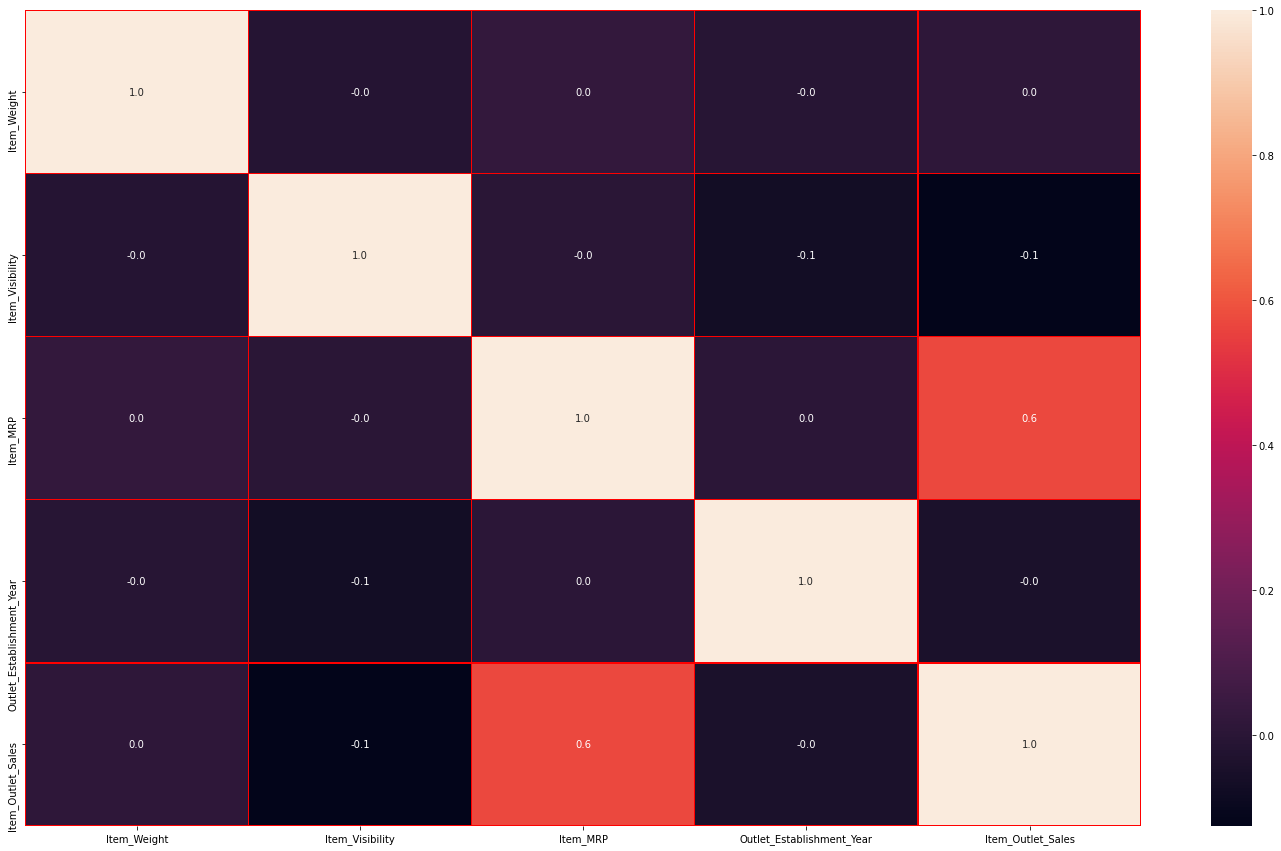

In [14]:
f,ax = plt.subplots(figsize=(25, 15))
sns.heatmap(dfnumerical.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

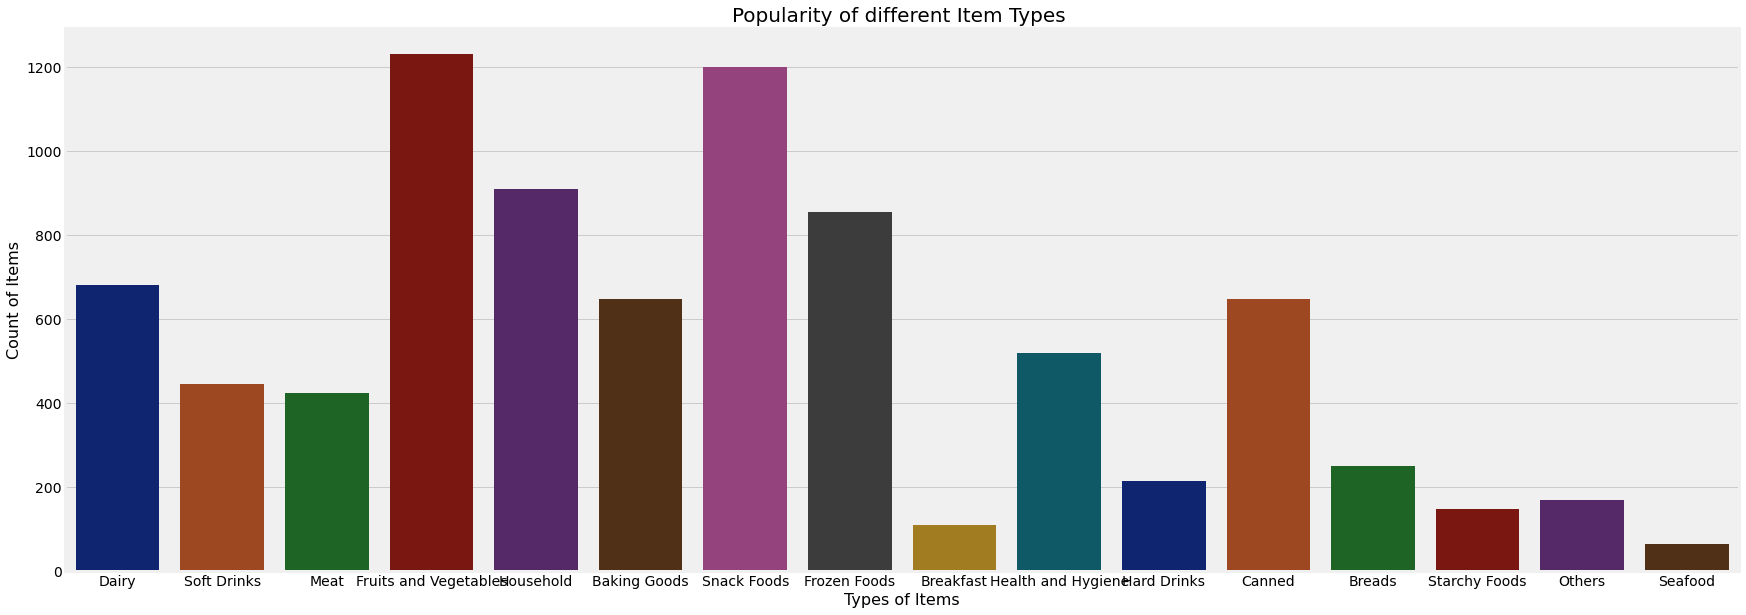

In [15]:
plt.figure(figsize = (30, 10))
plt.style.use('fivethirtyeight')
ax = sns.countplot('Item_Type', data = dfcat, palette = 'dark')
ax.set_xlabel(xlabel = 'Types of Items', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Items', fontsize = 16)
ax.set_title(label = 'Popularity of different Item Types ', fontsize = 20)
plt.show()

In [16]:
y=dfnumerical["Item_Outlet_Sales"]
dfnumerical.drop("Item_Outlet_Sales",axis=1,inplace=True)

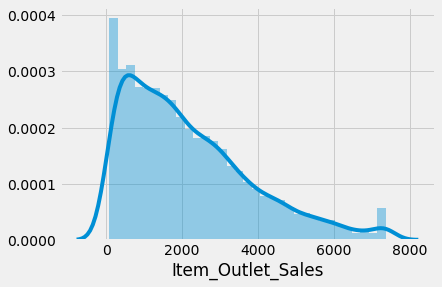

In [17]:
sns.distplot(y)

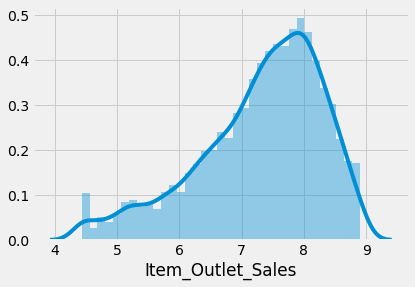

In [18]:
sns.distplot(np.log(y))

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables =dfnumerical

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = dfnumerical.columns
vif

,VIF,Features
0,10.302468,Item_Weight
1,2.723994,Item_Visibility
2,6.138435,Item_MRP
3,16.911640,Outlet_Establishment_Year


In [20]:
dfnumerical.drop("Outlet_Establishment_Year",axis=1,inplace=True)

In [21]:
dfnumerical

,Item_Weight,Item_Visibility,Item_MRP
0,9.300,0.016047,249.8092
1,5.920,0.019278,48.2692
2,17.500,0.016760,141.6180
3,19.200,0.000000,182.0950
4,8.930,0.000000,53.8614
...,...,...,...
8518,6.865,0.056783,214.5218
8519,8.380,0.046982,108.1570
8520,10.600,0.035186,85.1224
8521,7.210,0.145221,103.1332


In [22]:
dfcat

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...
8518,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,Regular,Baking Goods,OUT045,Medium,Tier 2,Supermarket Type1
8520,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [23]:
dfcat.drop("Outlet_Identifier",axis=1,inplace=True)

C:\Users\JAY\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [24]:
dfcat["Outlet_Size"]=dfcat["Outlet_Size"].map({"Medium":2,"High":3,"Small":1})

<ipython-input-24-52fb07d9243e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcat["Outlet_Size"]=dfcat["Outlet_Size"].map({"Medium":2,"High":3,"Small":1})


In [25]:
print(dfcat["Outlet_Type"].unique())
print(dfcat["Outlet_Location_Type"].unique())
print(dfcat["Item_Fat_Content"].unique())

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
['Tier 1' 'Tier 3' 'Tier 2']
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [26]:
dfcat["Item_Fat_Content"]=dfcat["Item_Fat_Content"].replace({"LF":"Low Fat","low fat":"Low Fat"})
dfcat["Item_Fat_Content"]=dfcat["Item_Fat_Content"].replace("reg","Regular")

<ipython-input-26-0aa4afc87c07>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcat["Item_Fat_Content"]=dfcat["Item_Fat_Content"].replace({"LF":"Low Fat","low fat":"Low Fat"})
<ipython-input-26-0aa4afc87c07>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcat["Item_Fat_Content"]=dfcat["Item_Fat_Content"].replace("reg","Regular")


In [27]:
dfcat["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [28]:
dfcat["Item_Fat_Content"]=dfcat["Item_Fat_Content"].map({"Low Fat":1,"Regular":0})

<ipython-input-28-4261d3fdce0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcat["Item_Fat_Content"]=dfcat["Item_Fat_Content"].map({"Low Fat":1,"Regular":0})


In [29]:
dfcat["Outlet_Location_Type"]=dfcat["Outlet_Location_Type"].map({"Tier 1":1,"Tier 2":2,"Tier 3":3})

<ipython-input-29-8bc0a7cad797>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcat["Outlet_Location_Type"]=dfcat["Outlet_Location_Type"].map({"Tier 1":1,"Tier 2":2,"Tier 3":3})


In [30]:
dfcat

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1,Dairy,2,1,Supermarket Type1
1,0,Soft Drinks,2,3,Supermarket Type2
2,1,Meat,2,1,Supermarket Type1
3,0,Fruits and Vegetables,2,3,Grocery Store
4,1,Household,3,3,Supermarket Type1
...,...,...,...,...,...
8518,1,Snack Foods,3,3,Supermarket Type1
8519,0,Baking Goods,2,2,Supermarket Type1
8520,1,Health and Hygiene,1,2,Supermarket Type1
8521,0,Snack Foods,2,3,Supermarket Type2


In [31]:
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df
dfcat= create_dummies( dfcat,"Outlet_Type")

In [32]:
dfcat.drop("Item_Type",axis=1,inplace=True)

In [33]:
dfcat

,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1,2,1,1,0,0
1,0,2,3,0,1,0
2,1,2,1,1,0,0
3,0,2,3,0,0,0
4,1,3,3,1,0,0
...,...,...,...,...,...,...
8518,1,3,3,1,0,0
8519,0,2,2,1,0,0
8520,1,1,2,1,0,0
8521,0,2,3,0,1,0


In [34]:
df=pd.concat([dfnumerical,dfcat],axis=1)

In [35]:
df

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1,2,1,1,0,0
1,5.920,0.019278,48.2692,0,2,3,0,1,0
2,17.500,0.016760,141.6180,1,2,1,1,0,0
3,19.200,0.000000,182.0950,0,2,3,0,0,0
4,8.930,0.000000,53.8614,1,3,3,1,0,0
...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1,3,3,1,0,0
8519,8.380,0.046982,108.1570,0,2,2,1,0,0
8520,10.600,0.035186,85.1224,1,1,2,1,0,0
8521,7.210,0.145221,103.1332,0,2,3,0,1,0


In [36]:
df.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Fat_Content',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [37]:
y=np.log10(y)

In [38]:
y

0       3.572307
1       2.646818
2       3.321654
3       2.864736
4       2.997694
          ...   
8518    3.443792
8519    2.739798
8520    3.076682
8521    3.266137
8522    2.884042
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=55)

In [40]:
from sklearn.ensemble import RandomForestRegressor
pargrid_rf = {'n_estimators': [10,20,30,40,50, 60],
                  'max_features': [5,6,7,8,9,10,11,12]}

from sklearn.model_selection import GridSearchCV
gscv_rf = GridSearchCV(estimator=RandomForestRegressor(), 
                        param_grid=pargrid_rf, 
                        cv=5,
                        verbose=True, n_jobs=-1)
gscv_results = gscv_rf.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   12.3s finished


In [41]:
print(gscv_results.best_params_)
print(gscv_rf.best_score_)

{'max_features': 5, 'n_estimators': 60}
0.7010633359305642


In [42]:
radm = RandomForestRegressor(n_estimators=50, max_features=5, n_jobs=-1)
radm.fit( X_train, y_train )

RandomForestRegressor(max_features=5, n_estimators=50, n_jobs=-1)

In [43]:
from sklearn import metrics
y_pred_train=radm.predict(X_train)
y_pred_test=radm.predict(X_test)
print(metrics.r2_score(y_train,y_pred_train))
print(metrics.r2_score(y_test,y_pred_test))

0.9570294435971248
0.6918644816222843


In [44]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit( X_train, y_train )
y_pred = linreg.predict( X_train )

In [45]:
y_pred_train = linreg.predict( X_train )
y_pred_test=linreg.predict(X_test)
print(metrics.r2_score(y_test,y_pred_test))
print(metrics.r2_score(y_train,y_pred_train))

0.7096833265420691
0.720910406699277


In [46]:
import os
os.chdir(""/Users/raghavkachroo/Desktop/iNeuron/Store-Sales-Prediction")

In [47]:
import joblib
joblib.dump(linreg,"model_save")

['model_save']